## Предварительный анализ данных

### Подготовка данных

#### Загрузка приложений

In [2]:
import os

import pandas as pd
import numpy as np


# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()


# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

#ml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
%pip install catboost
from catboost import CatBoostClassifier, Pool

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [3]:
!pip install imbalanced-learn
#!pip install phik

In [4]:
#немного опций для удобства

pd.options.display.max_rows = 80
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

sns.set_palette('deep')
sns.set_style("whitegrid")


#### Загрузка  файлов

In [5]:
# Для загрузки файлов с Гугл диска

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# загружаем файлы

pth1='https://disk.yandex.ru/d/QYraoEwmfQZ90Q'
pth2='/home/alexandra/data_science/network_traffic_data.csv'
pth3='/content/gdrive/MyDrive/network_traffic_data.csv'

try:

  if os.path.exists(pth1):
    df = pd.read_csv(pth1, delimiter='\,')
  elif os.path.exists(pth2):
    df = pd.read_csv(pth2, delimiter='\,')
  else:
    df = pd.read_csv(pth3, delimiter='\,')

  print('Загрузка файла прошла успешно')
except:
  print('Ошибка загрузки файла. Проверьте путь к файлу.')


Загрузка файла прошла успешно


#### Первичная информация

In [7]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,0,0,0.0,0.0,2.189751,0.729917,1.826691e+06,3.131700e+06,5442804,101,5480074,2740037.000,3.822290e+06,5442804,37270,0,0.000,0.00,0,0,0,0,0,0,72,32,0.547438,0.182479,0,6,2.4,3.287,1.080000e+01,0,0,0,1,0,0,0,0,0,3.00,4.000,0.0,72,0,0,0,0,0,0,3,12,1,0,8192,42780,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,1448,0,395.0,587.5,6535.323473,26.686255,3.955428e+04,5.015462e+04,120501,1,616301,77037.625,7.299598e+04,215614,230,616874,68541.555,71985.97,199836,1,0,0,0,0,296,328,12.640858,14.045398,0,1448,232.6,442.800,1.960127e+05,0,0,0,1,0,0,0,0,1,244.90,78.100,395.0,296,0,0,0,0,0,0,9,703,10,3950,29200,252,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,112,112,112.0,0.0,1981.772904,26.075959,5.113267e+04,8.855831e+04,153391,3,3,3.000,0.000000e+00,3,3,4,4.000,0.00,4,4,0,0,0,0,40,40,13.037980,13.037980,40,112,68.8,39.440,1.555200e+03,0,0,0,0,0,0,0,0,1,86.00,40.000,112.0,40,0,0,0,0,0,0,2,80,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,128,128,128.0,0.0,3017.689906,34.686091,5.766000e+04,0.000000e+00,57660,57660,0,0.000,0.000000e+00,0,0,0,0.000,0.00,0,0,0,0,0,0,20,20,17.343046,17.343046,46,128,73.3,47.340,2.241333e+03,0,0,0,0,0,0,0,0,1,110.00,46.000,128.0,20,0,0,0,0,0,0,1,46,1,128,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,6,6,6.0,0.0,63885.267280,5215.123859,2.556667e+02,3.942896e+02,710,3,713,356.500,4.999245e+02,710,3,0,0.000,0.00,0,0,0,0,0,0,60,20,3911.342800,1303.781000,6,31,11.0,11.180,1.250000e+02,0,0,0,0,1,0,0,0,0,13.75,14.336,6.0,60,0,0,0,0,0,0,3,43,1,6,1017,0,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539611,80,11512204,8,5,326,11632,326,0,40.750,115.250,10184,0,2326.0,4436.0,1038.723775,1.129236,9.593503e+05,2.262616e+06,6507197,1,6510770,930110.000,2.460477e+06,6509948,1,11500000,2878039.500,3378874.20,6507197,196,0,0,0,0,264,168,0.694915,0.434322,0,10184,854.0,2714.000,7.361769e+06,0,0,0,1,0,0,0,0,0,920.00,40.750,2326.0,264,0,0,0,0,0,0,8,326,5,11632,29200,235,1,32,892.0,0.0,892,892,6507197.0,0.0,6507197,6507197,DoS GoldenEye
539612,80,11513325,5,5,471,3525,471,0,94.200,210.600,2077,0,705.0,990.5,347.076105,0.868559,1.279258e+06,2.565153e+06,6508582,53,6512631,1628157.800,3.255639e+06,6511616,176,11500000,2878318.000,3379306.00,6508582,192,0,0,0,0,16

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Destination Port              539616 non-null  int64  
 1    Flow Duration                539616 non-null  int64  
 2    Total Fwd Packets            539616 non-null  int64  
 3    Total Backward Packets       539616 non-null  int64  
 4   Total Length of Fwd Packets   539616 non-null  int64  
 5    Total Length of Bwd Packets  539616 non-null  int64  
 6    Fwd Packet Length Max        539616 non-null  int64  
 7    Fwd Packet Length Min        539616 non-null  int64  
 8    Fwd Packet Length Mean       539616 non-null  float64
 9    Fwd Packet Length Std        539616 non-null  float64
 10  Bwd Packet Length Max         539616 non-null  int64  
 11   Bwd Packet Length Min        539616 non-null  int64  
 12   Bwd Packet Length Mean       539616 non-nul

In [9]:
df['Label'].unique()

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Heartbleed'],
      dtype=object)

<Axes: xlabel='Label'>

Text(0.5, 1.0, 'Распределения по классам')

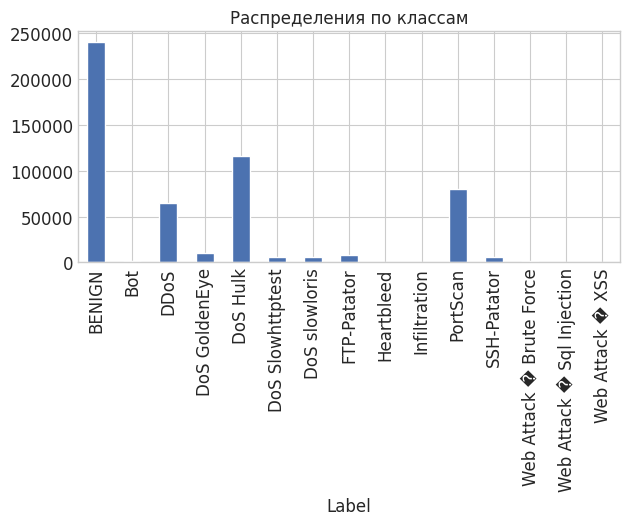

In [10]:
# проверим сбалансированность классов
df.groupby('Label')['Total Length of Fwd Packets'].count().plot.bar(x='Label', figsize=(7,3))

plt.title('Распределения по классам', fontsize=12)
plt.show()

Данные очень разбалансированы, надо будет добавлять баланс классов

### Предобработка данных

#### Заполнение пропусков / удаление дубликатов

In [11]:
df_test=df[df.isnull().any(1)]
df_test['Label'].unique()

array(['BENIGN', 'DoS Hulk'], dtype=object)

В принципе, нулевые строки можно удалить

In [12]:
df=df.dropna ()

In [13]:
# есть еще строки с бесконечными значениями.

df_test=df[df.isin([np.inf, -np.inf]).any(1)]
df_test['Label'].unique()
df_test=df_test.loc[df_test['Label']=='Bot']

df_test

array(['BENIGN', 'PortScan', 'DDoS', 'Bot', 'FTP-Patator'], dtype=object)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
500037,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500129,52235,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,245,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500585,2846,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,237,16393,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500680,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500693,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500705,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500737,2876,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,237,16393,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
500812,2906,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,237,16390,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
501003,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot
501221,8080,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,inf,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,256,237,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Bot


In [14]:
df=df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
df[df.isin([np.inf, -np.inf]).any(1)]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [15]:
df=df.drop_duplicates()

Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags



FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count, CWE Flag Count, ECE Flag Count





In [16]:
cat_columns = [30,31,32,33,43,44,45,46,47,48,49,50]
numeric = df.select_dtypes('float').columns



#### Выделение признаков и таргета

In [17]:
# Делим наши данные
target = df['Label']
features = df.drop('Label', axis=1)


In [18]:
#target=np.reshape(target,-1)

features_test, features_train, target_test, target_train = train_test_split(features, target, test_size=0.80, random_state=12345, stratify=target)

features_val, features_train, target_val, target_train = train_test_split(features_train, target_train, test_size=0.8, random_state=12345, stratify=target_train)


In [19]:
features_train.shape
features_test.shape
features_val.shape

target_train.shape
target_test.shape
target_val.shape

(303984, 78)

(94995, 78)

(75996, 78)

(303984,)

(94995,)

(75996,)

## Построение модели машинного обучения

### Построение бейзлайна

возьмем в качестве байзлайна Catboost, так как к нему не надо никакой особой подготовки данных

In [20]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

# from google.colab import output
# output.enable_custom_widget_manager()


model_bas_cb = CatBoostClassifier(cat_features=[30,31,32,33,43,44,45,46,47,48,49,50],
                                  task_type="GPU",
                                  random_state=12345)

model_bas_cb.fit(features_train, target_train,
                 verbose=3,
                 plot=True)

print(model_bas_cb.get_all_params())

# к сожалению Google Colab не рисует, а очень хотелось посмотреть графики


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.208346
0:	learn: 0.7103989	total: 51.7ms	remaining: 51.7s
3:	learn: 0.3508356	total: 216ms	remaining: 53.7s
6:	learn: 0.2095375	total: 324ms	remaining: 46s
9:	learn: 0.1388515	total: 431ms	remaining: 42.7s
12:	learn: 0.0976992	total: 510ms	remaining: 38.7s
15:	learn: 0.0718512	total: 583ms	remaining: 35.9s
18:	learn: 0.0546009	total: 657ms	remaining: 33.9s
21:	learn: 0.0454327	total: 724ms	remaining: 32.2s
24:	learn: 0.0390445	total: 800ms	remaining: 31.2s
27:	learn: 0.0352358	total: 873ms	remaining: 30.3s
30:	learn: 0.0316560	total: 950ms	remaining: 29.7s
33:	learn: 0.0287809	total: 1.02s	remaining: 29s
36:	learn: 0.0256470	total: 1.09s	remaining: 28.4s
39:	learn: 0.0238444	total: 1.16s	remaining: 27.9s
42:	learn: 0.0215451	total: 1.25s	remaining: 27.9s
45:	learn: 0.0197385	total: 1.33s	remaining: 27.5s
48:	learn: 0.0188971	total: 1.39s	remaining: 27s
51:	learn: 0.0180573	total: 1.48s	remaining: 27s
54:	learn: 0.0172335	total: 1.57s	remaining: 26.9s
57:	learn: 0

{'nan_mode': 'Min', 'gpu_ram_part': 0.95, 'eval_metric': 'MultiClass', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'], 'iterations': 1000, 'fold_permutation_block': 64, 'leaf_estimation_method': 'Newton', 'observations_to_bootstrap': 'TestOnly', 'random_score_type': 'NormalWithModelSizeDecrease', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'ctr_history_unit': 'Sample', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'devices': '-1', 'eval_fraction': 0, 'pinned_memory_bytes': '104857600', 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'gpu_cat_features_storage': 'GpuRam', 'fold_size_loss_normalization': False, 'max_ctr

In [21]:
preds = model_bas_cb.predict(features_val)

print ("Accuracy:", accuracy_score(target_val, preds))
print ("F1_macro:", f1_score(target_val, preds, average='macro'))



Accuracy: 0.9972761724301279
F1_macro: 0.9223742205228601


In [22]:
# немного анализа
target_names = ['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'Bot', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS',
                'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator','DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Heartbleed']

print(classification_report(target_val, preds, target_names=target_names))

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     37244
                  PortScan       0.94      0.97      0.96       312
                  DoS Hulk       1.00      1.00      1.00     10298
                      DDoS       1.00      1.00      1.00      1646
                       Bot       1.00      1.00      1.00     13960
              Infiltration       1.00      0.99      0.99       836
  Web Attack � Brute Force       1.00      0.99      0.99       862
          Web Attack � XSS       1.00      1.00      1.00       949
Web Attack � Sql Injection       1.00      1.00      1.00         2
               FTP-Patator       1.00      1.00      1.00         6
               SSH-Patator       1.00      1.00      1.00      9024
             DoS slowloris       1.00      1.00      1.00       515
          DoS Slowhttptest       0.70      0.79      0.74       235
             DoS GoldenEye       0.75      1.00

In [23]:
importances = model_bas_cb.feature_importances_  # train_features is the dataframe of training features
feature_list = list(features_val.columns)  # Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})  # Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.tail(50)

,feature,importance
28,Fwd IAT Mean,0.919934
29,Bwd Header Length,0.844191
30,Bwd IAT Std,0.783720
31,Bwd IAT Min,0.779188
32,Flow IAT Std,0.732682
33,Bwd IAT Mean,0.731779
34,ACK Flag Count,0.568202
35,Fwd IAT Max,0.538430
36,Avg Fwd Segment Size,0.509131
37,Down/Up Ratio,0.486202


Я провела эксперимент и начала удалять ненужные вроде стобцы, которые на последнем месте в importances.

Вывод: если убирать вроде бы не нужные столбцы, то результат ухудшается

### Обучение модели

#### Масштабирование данных

In [24]:
# кодируем признаки
#!pip install -U scikit-learn

col_transformer = ColumnTransformer(transformers=[('ss', StandardScaler(), numeric),('oe', OrdinalEncoder(), cat_columns)], remainder='drop')


features_train_oe = col_transformer.fit_transform(features_train)



In [25]:
#убираем выбросы
features_train.shape

for name, values in features_train[numeric].iteritems():
  upper_lim = features_train[name].quantile(.95)
  lower_lim = features_train[name].quantile(.05)
  features_train.loc[(features_train[name] > upper_lim),name] = upper_lim
  features_train.loc[(features_train[name] < lower_lim),name] = lower_lim

features_train.shape

(303984, 78)

(303984, 78)

#### Построение пайплайна

In [26]:
# pipe_kNN = Pipeline([('clf', KNeighborsClassifier())])

# pipe_rfr = Pipeline([('clf', RandomForestClassifier(random_state=12345, class_weight='balanced'))])

# pipe_lgbm = Pipeline([('clf', LGBMClassifier(boosting_type='gbdt'))])





In [27]:
# grid_params_cbc = [{'clf__n_neighbors': range(3,8,2)}]

# grid_params_rfr = [{'clf__max_depth': range(5,13,2), 'clf__n_estimators': range(100, 260, 50)}]

# grid_params_lgbm = [{'clf__max_depth': range(1,10,2),
#                      'clf__n_estimators': range(10, 100, 30),
#                      'clf__num_leaves': range(1,5,2)}]

# kNN = GridSearchCV(estimator=pipe_kNN,
#                    param_grid=grid_params_cbc,
#                    scoring='f1_macro',
#                    cv=5,
#                    verbose=3)

# RFR = GridSearchCV(estimator=pipe_rfr,
#                    param_grid=grid_params_rfr,
#                    scoring='f1_macro',
#                    cv=5,
#                    verbose=3)

# LGBM = GridSearchCV(estimator=pipe_lgbm,
#                     param_grid=grid_params_lgbm,
#                     scoring='f1_macro',
#                     cv=5,
#                     verbose=3)

# grids = [kNN, LGBM, RFR]

# grid_dict = {0: 'kNN',
#              1: 'LGBMClassifier',
#              2: 'RandomForestC'}

In [27]:
# print('Performing model optimizations...')
# best_acc = -100.0
# best_clf = 0
# best_gs = ''
# for idx, gs in enumerate(grids):
#     print('\nEstimator: %s' % grid_dict[idx])
#     gs.fit(features_train, target_train)
#     print('Best params are : %s' % gs.best_params_)
#     print('Best training accuracy: %.3f' % gs.best_score_)
#     if  gs.best_score_ > best_acc:
#         best_acc = gs.best_score_
#         best_gs = gs
#         best_clf = idx
#         best_param = gs.best_params_

# print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

По итогам прогона paip, лучшие результаты из этих моделей показала модель случайного леса.

Я заккоментировала ячейки, так как очень долго идет перебор гиперпараметров.

#### Улучшаем модель

In [28]:
model_rfc=RandomForestClassifier(max_depth=20,
                                 n_estimators=400,
                                 random_state=12345,
                                 class_weight='balanced')

model_rfc.fit(features_train, target_train)



RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=400,
                       random_state=12345)

In [29]:
preds = model_rfc.predict(features_val)

print ("Accuracy_RFC:",accuracy_score(target_val, preds))
print ("F1_macro_RFC:", f1_score(target_val, preds, average='macro'))



target_names = ['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'Bot', 'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS',
                'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator','DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Heartbleed']

print(classification_report(target_val, preds, target_names=target_names))

Accuracy_RFC: 0.995749776304016
F1_macro_RFC: 0.9005823501827143
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     37244
                  PortScan       0.72      0.99      0.83       312
                  DoS Hulk       1.00      1.00      1.00     10298
                      DDoS       1.00      1.00      1.00      1646
                       Bot       1.00      1.00      1.00     13960
              Infiltration       1.00      0.99      1.00       836
  Web Attack � Brute Force       1.00      0.99      0.99       862
          Web Attack � XSS       1.00      1.00      1.00       949
Web Attack � Sql Injection       1.00      1.00      1.00         2
               FTP-Patator       1.00      1.00      1.00         6
               SSH-Patator       1.00      1.00      1.00      9024
             DoS slowloris       1.00      1.00      1.00       515
          DoS Slowhttptest       0.76      0.76   

In [38]:
# улучшаем CatBOOst

model_bas_cb = CatBoostClassifier(task_type="GPU",
                                  random_state=12345,
                                  learning_rate=0.15,
                                  custom_loss=['F1', 'Accuracy'],
                                  )

model_bas_cb.fit(features_train, target_train,
                 eval_set=(features_train, target_train),
                 verbose=3)

print(model_bas_cb.get_all_params())

0:	learn: 1.0999364	test: 1.0999364	best: 1.0999364 (0)	total: 83.4ms	remaining: 1m 23s
3:	learn: 0.5926071	test: 0.5926070	best: 0.5926070 (3)	total: 304ms	remaining: 1m 15s
6:	learn: 0.3759915	test: 0.3759915	best: 0.3759915 (6)	total: 453ms	remaining: 1m 4s
9:	learn: 0.2584059	test: 0.2584059	best: 0.2584059 (9)	total: 583ms	remaining: 57.7s
12:	learn: 0.1845243	test: 0.1845243	best: 0.1845243 (12)	total: 709ms	remaining: 53.8s
15:	learn: 0.1386106	test: 0.1386106	best: 0.1386106 (15)	total: 831ms	remaining: 51.1s
18:	learn: 0.1089521	test: 0.1089522	best: 0.1089522 (18)	total: 951ms	remaining: 49.1s
21:	learn: 0.0834781	test: 0.0834781	best: 0.0834781 (21)	total: 1.09s	remaining: 48.3s
24:	learn: 0.0678864	test: 0.0678864	best: 0.0678864 (24)	total: 1.2s	remaining: 47s
27:	learn: 0.0570679	test: 0.0570680	best: 0.0570680 (27)	total: 1.32s	remaining: 46s
30:	learn: 0.0479039	test: 0.0479039	best: 0.0479039 (30)	total: 1.47s	remaining: 45.9s
33:	learn: 0.0425349	test: 0.0425349	best:

{'nan_mode': 'Min', 'gpu_ram_part': 0.95, 'eval_metric': 'MultiClass', 'iterations': 1000, 'leaf_estimation_method': 'Newton', 'observations_to_bootstrap': 'TestOnly', 'random_score_type': 'NormalWithModelSizeDecrease', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'devices': '-1', 'eval_fraction': 0, 'pinned_memory_bytes': '104857600', 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'gpu_cat_features_storage': 'GpuRam', 'fold_size_loss_normalization': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': True, 'meta_l2_frequency': 0, 'class_names': ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack � Brute Force', 'Web Attack � Sql Injectio

In [39]:
preds = model_bas_cb.predict(features_val)

print ("Accuracy_CBC:", accuracy_score(target_val, preds))
print ("F1_macro_CBC:", f1_score(target_val, preds, average='macro'))

Accuracy_CBC: 0.9974209168903626
F1_macro_CBC: 0.9275059602231857


Лучшего результата добиться не удалось сколько я бы модель не крутила.

Останавливаюсь на CatBoost, у него метрики чуть выше чем у Леса.

### Сохранение модели

In [42]:
model_bas_cb.save_model('model.cbm', format="cbm")


### Читаем модель и тестируем на тестовых данных

In [44]:
model = CatBoostClassifier()      # parameters not required.
model.load_model('model.cbm')


preds = model.predict(features_test)

print('Метрики тестовых данных:')
preds
print(' ')
print ("Accuracy:",accuracy_score(target_test, preds))
print ("F1_macro:", f1_score(target_test, preds, average='macro'))


Метрики тестовых данных:


array([['DoS Hulk'],
       ['DDoS'],
       ['BENIGN'],
       ...,
       ['DDoS'],
       ['BENIGN'],
       ['BENIGN']], dtype=object)

 
Accuracy: 0.9972419601031633
F1_macro: 0.8938793183027726


F1 на тесте чуть хуже, но это нормально наверное.